In [180]:
import os
import pandas as pd
# import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# from my_functions_syntheticprofiles import *

model_directory = '../../../../FloodModelling/MeganModel_New/'

In [10]:
cluster_results= pd.read_csv("Data/allclusters_summary.csv")

In [17]:
columns_obs = ['Time', '6h_feh_sp', '6h_c1', '6h_c2','6h_c3', '6h_c4', '6h_c5', '6h_c6','6h_c7', '6h_c8','6h_c9', '6h_c10', 
               '6h_c11', '6h_c12', '6h_c13', '6h_c14', '6h_c15']
columns_synth = ['Time', '6h_feh_sp', '6h_sp', '6h_ms', '6h_dt', '6h_spt']

In [137]:
depth_timeseries = pd.read_csv(model_directory + "ProfileLines/{}/Depth_Timeseries.csv".format('KippaxBeck'))[columns_obs]

peak_times = []
max_vals = []

for number, column in enumerate(depth_timeseries.columns[1:]):
    max_row = depth_timeseries[depth_timeseries[column] == depth_timeseries[column].max()]
    if len(max_row) == 0:
        peak_times.append(np.nan)
        max_vals.append(np.nan)
    else:
        peak_times.append(pd.to_datetime(max_row['Time'])[max_row['Time'].index[0]])
        max_vals.append(max_row[column][max_row[column].index[0]])

In [168]:
cleanedList = [x for x in peak_times if str(x) != 'nan']

In [178]:
minutes_diff = (max(cleanedList) - min(cleanedList)).total_seconds()/ 60.0 #/60
minutes_diff

279.0

Maximum depth (C5 - 0.6m) is 39.5% greater than the minimum (C15 - 0.43m). 

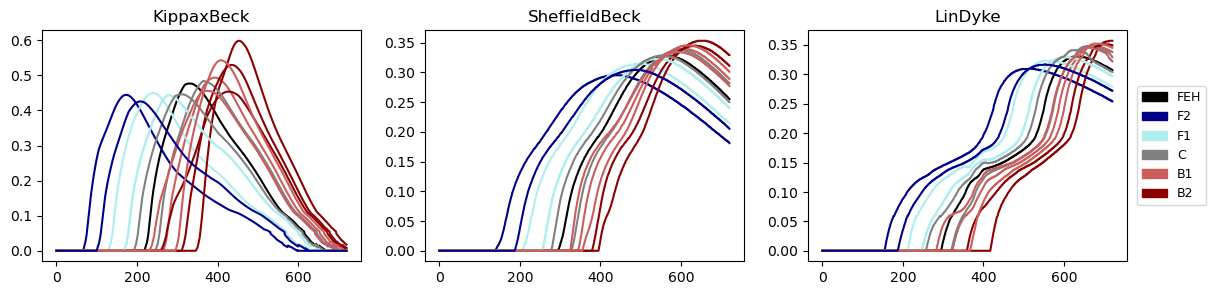

In [183]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (14,3))
for axs_numb, profile_line in enumerate(['KippaxBeck', 'SheffieldBeck', 'LinDyke']):
    depth_timeseries = pd.read_csv(model_directory + "ProfileLines/{}/Depth_Timeseries.csv".format(profile_line))[columns_obs]
    for number, column in enumerate(depth_timeseries.columns[1:]):
        axs[axs_numb].plot(depth_timeseries[column], color = cluster_results['colour'][number])
        axs[axs_numb].set_title(profile_line)
# Legend
colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.14, 0.5), loc='center', ncol=1, prop={'size': 9} )   ;

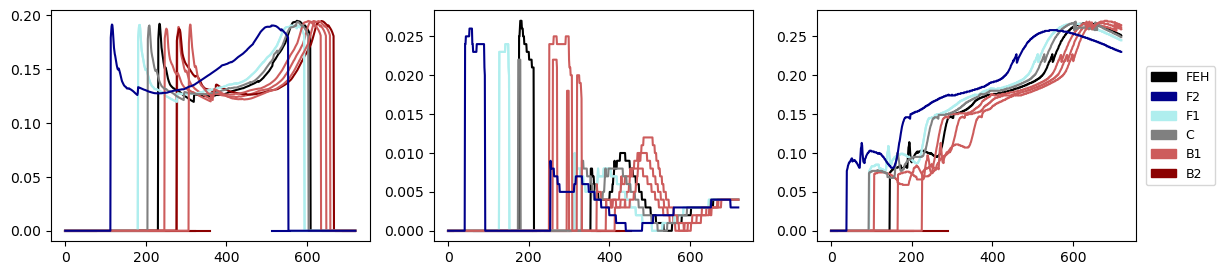

In [182]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (14,3))
for axs_numb, profile_line in enumerate(['KippaxBeck', 'SheffieldBeck', 'LinDyke']):
    velocity_timeseries = pd.read_csv(model_directory + "ProfileLines/{}/Velocity_Timeseries.csv".format(profile_line))[columns_obs]
    for number, column in enumerate(velocity_timeseries.columns[1:]):
        axs[axs_numb].plot(velocity_timeseries[column], color = cluster_results['colour'][number])
# Legend
colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.14, 0.5), loc='center', ncol=1, prop={'size': 9} )   ; 

As you travel downstream:  
* The peak flow reduces (suggesting in journey downstream some water is lost i.e. to ponding or storage somewhere (this water will later be released)
* The time to peak increases (i.e. the peak occurs later in the event) as it takes longer for the water to travel downstream

Do certai profiles cause higher/lower and later/earlier peak flows?
If storage areas are filled up earlier then this would cause flow to peak higher and earlier

Create table of the time of the peak flow and calculate % difference in peak flow between different profiles

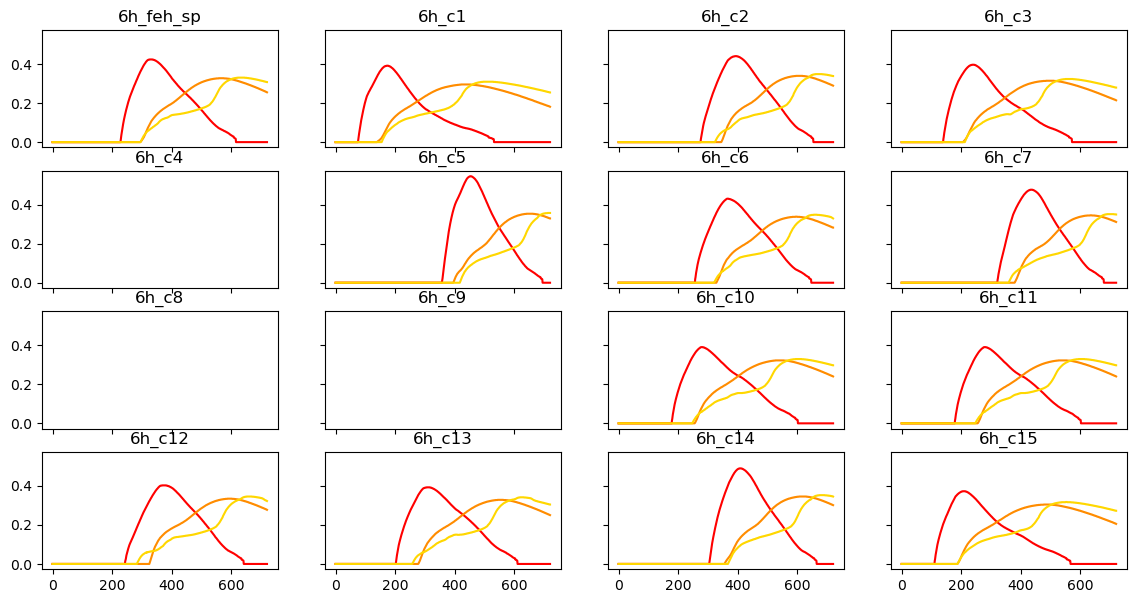

In [73]:
colors_downstream = ['red', 'darkorange', 'gold']
fig, axs = plt.subplots(nrows=4, ncols=4, figsize = (14,7), sharex=True, sharey=True)
col_num =0
for i in range(4):
    for j in range(4):
        column = velocity_timeseries.columns[1:][col_num]
        col_num+= 1
        # Plot line for each profile line location
        for axs_numb, profile_line in enumerate(['KippaxBeck', 'SheffieldBeck', 'LinDyke']):
            depth_timeseries = pd.read_csv(model_directory + "ProfileLines/{}/Depth_Timeseries.csv".format(profile_line))[columns_obs]
            axs[i,j].plot(depth_timeseries[column], color = colors_downstream[axs_numb])
            axs[i,j].set_title(column)